# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pandan
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | yanam
Processing Record 5 of Set 1 | taroa
Processing Record 6 of Set 1 | kailua-kona
Processing Record 7 of Set 1 | island harbour
Processing Record 8 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 9 of Set 1 | esquel
Processing Record 10 of Set 1 | zelenogorsk
Processing Record 11 of Set 1 | nova odesa
Processing Record 12 of Set 1 | tralee
Processing Record 13 of Set 1 | mejit
Processing Record 14 of Set 1 | mahanoro
Processing Record 15 of Set 1 | brisas de zicatela
Processing Record 16 of Set 1 | san juan de miraflores
Processing Record 17 of Set 1 | puerto baquerizo moreno
Processing Record 18 of Set 1 | rio gallegos
Processing Record 19 of Set 1 | trairi
Processing Record 20 of Set 1 | port blair
Processing Record 21 of Set 1 | hawaiian paradise par

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pandan,14.0453,124.1694,31.56,59,73,1.68,PH,1715403913
1,west island,-12.1568,96.8225,27.43,83,30,7.27,CC,1715403913
2,grytviken,-54.2811,-36.5092,-0.19,88,100,3.36,GS,1715403913
3,yanam,16.7333,82.2167,35.12,49,14,3.32,IN,1715403913
4,taroa,8.7058,171.2275,26.08,89,100,8.20,MH,1715403913


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pandan,14.0453,124.1694,31.56,59,73,1.68,PH,1715403913
1,west island,-12.1568,96.8225,27.43,83,30,7.27,CC,1715403913
2,grytviken,-54.2811,-36.5092,-0.19,88,100,3.36,GS,1715403913
3,yanam,16.7333,82.2167,35.12,49,14,3.32,IN,1715403913
4,taroa,8.7058,171.2275,26.08,89,100,8.20,MH,1715403913


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

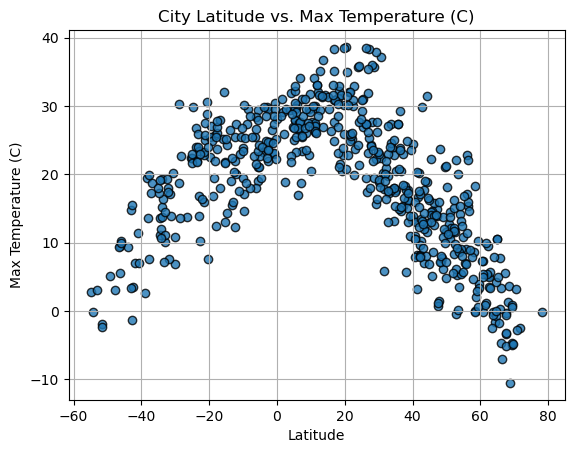

In [12]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

plt.scatter(latitude, temperature, alpha = 0.8, edgecolors= 'black')


# Incorporate the other graph properties
plt.grid ()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

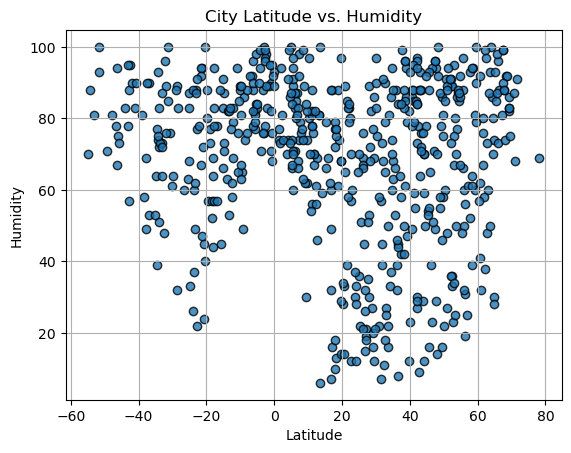

In [13]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

plt.scatter(latitude, humidity, alpha = 0.8, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid ()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

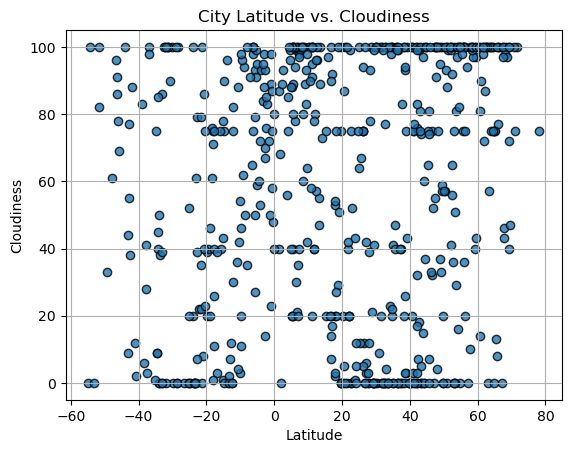

In [14]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']

plt.scatter(latitude, cloudiness, alpha = 0.8, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid ()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

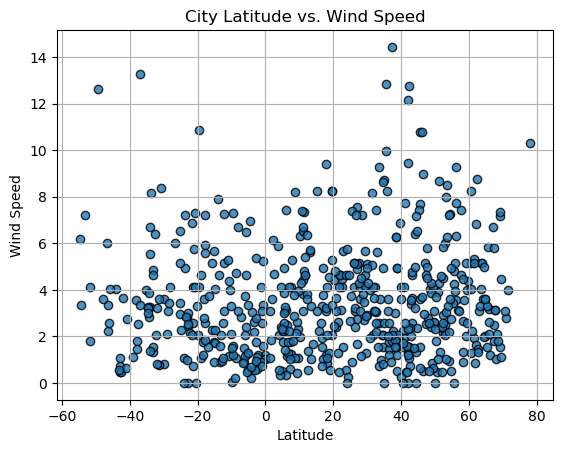

In [15]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']

plt.scatter(latitude, wind_speed, alpha = 0.8, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid ()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
# i,x,y,j,k = dataframe, x column name, y column name, x axis label, y axis label
def linregplot(i,x,y,j,k):
    lr_slope, lr_int, lr_r, lr_p, lr_std_err = linregress(i[x],i[y])
    lr_fit = lr_slope * i[x] + lr_int
    title = str(f"{j} vs. {k}")
    plt.scatter(i[x],i[y], alpha= 0.8, edgecolors= 'black')
    plt.plot(i[x],lr_fit, 'r', label = 'y = {:.2f} + {:.2f}*x'.format(lr_slope, lr_int))
    plt.legend(loc = 'best')
    plt.xticks(rotation=0)
    plt.xlabel(j)
    plt.ylabel(k)
    plt.title(title)

    print(f"The r-value is: {lr_r}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pandan,14.0453,124.1694,31.56,59,73,1.68,PH,1715403913
3,yanam,16.7333,82.2167,35.12,49,14,3.32,IN,1715403913
4,taroa,8.7058,171.2275,26.08,89,100,8.20,MH,1715403913
5,kailua-kona,19.6406,-155.9956,25.98,68,0,8.23,US,1715403913
6,island harbour,50.7240,-1.2758,12.74,91,93,0.45,GB,1715403914


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,west island,-12.1568,96.8225,27.43,83,30,7.27,CC,1715403913
2,grytviken,-54.2811,-36.5092,-0.19,88,100,3.36,GS,1715403913
7,esquel,-42.9000,-71.3167,-1.38,88,55,0.73,AR,1715403676
12,mahanoro,-19.9000,48.8000,22.48,88,39,2.08,MG,1715403914
14,san juan de miraflores,-12.1629,-76.9635,20.09,79,82,3.08,PE,1715403915


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8440454528188929


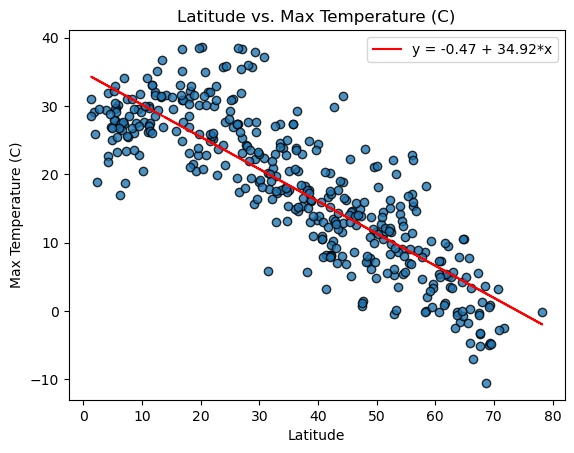

In [19]:
# Linear regression on Northern Hemisphere
linregplot(northern_hemi_df,"Lat", "Max Temp", "Latitude", "Max Temperature (C)")

The r-value is: 0.7509434491102231


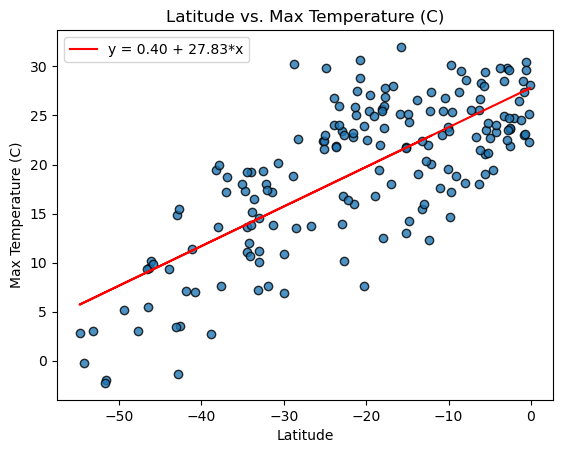

In [20]:
# Linear regression on Southern Hemisphere
linregplot(southern_hemi_df,"Lat", "Max Temp", "Latitude", "Max Temperature (C)")


**Discussion about the linear relationship: with the graph displayed we can conclude that there is a positive correlation between high temperatures with latitude tends to zero.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0567765807047352


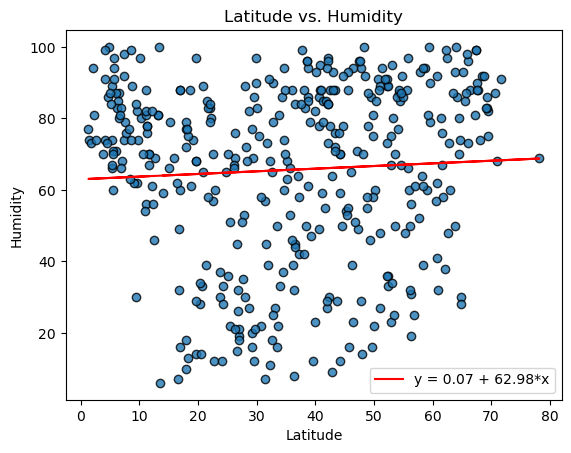

In [21]:
# Northern Hemisphere
linregplot(northern_hemi_df,"Lat", "Humidity", "Latitude", "Humidity")


The r-value is: 0.15156153068060388


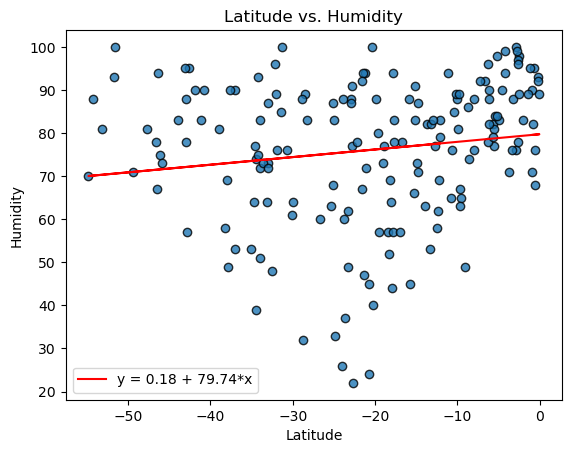

In [22]:
# Southern Hemisphere
linregplot(southern_hemi_df,"Lat", "Humidity", "Latitude", "Humidity")


**Discussion about the linear relationship:** With graphs we can see that northern hemisphere shows a positive correlation with high humidity while latitude increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08456003013546534


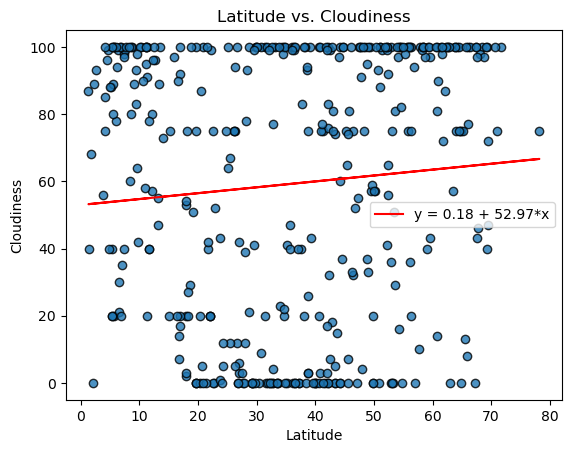

In [23]:
# Northern Hemisphere
linregplot(northern_hemi_df,"Lat", "Cloudiness", "Latitude", "Cloudiness")


The r-value is: 0.14556692083321385


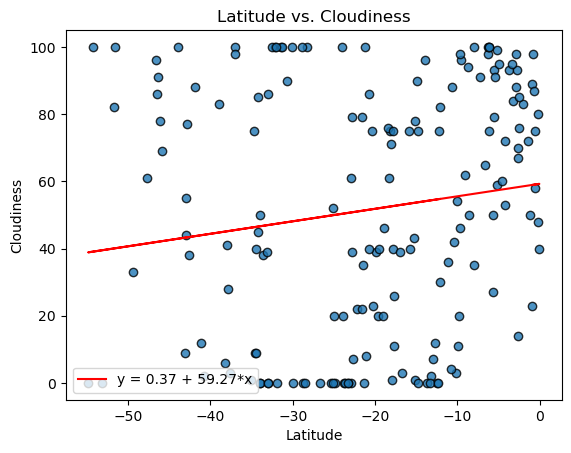

In [24]:
# Southern Hemisphere
linregplot(southern_hemi_df,"Lat", "Cloudiness", "Latitude", "Cloudiness")


**Discussion about the linear relationship:** We can see in grapghs that there are a large number of outliers in this data for Cloudiness which may make the conclusions unreliable or not accurate.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07279157070302988


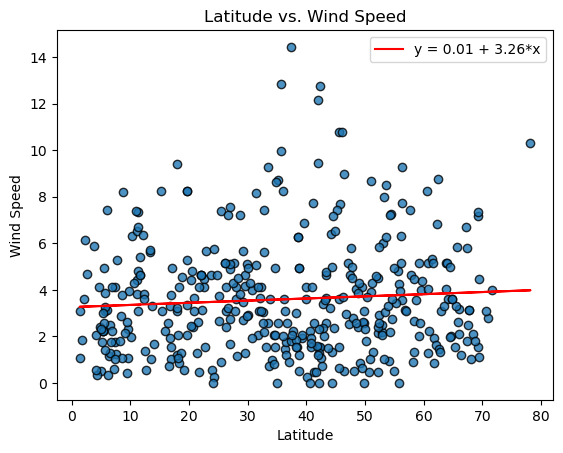

In [25]:
# Northern Hemisphere
linregplot(northern_hemi_df,"Lat", "Wind Speed", "Latitude", "Wind Speed")


The r-value is: -0.20833594986663495


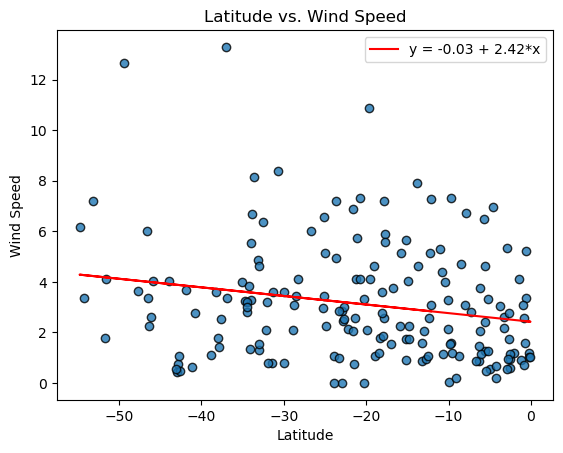

In [26]:
# Southern Hemisphere
linregplot(southern_hemi_df,"Lat", "Wind Speed", "Latitude", "Wind Speed")


**Discussion about the linear relationship:** We can see in graphs that there is no correlation shown between Latitude and Wind Speed, as it can vary significantly and does not appear to be affected by latitude. This is shown both in the plots and the r-values being close to 0.